In [56]:
%load_ext autoreload
%autoreload 2

import os
import random

from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import torch
import scipy.io

import experiment.mRNN as mRNN
import experiment.michaels_load as ml
import experiment.stim as stim
import experiment.utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
d = ml.load_from_path(ml.get_default_path())

In [26]:
bidx = random.randrange(d['targ'].shape[0])
fidx_i = random.randrange(d['inp'][0].shape[0] - 1)
fidx_o = random.randrange(d['targ'][0].shape[0])

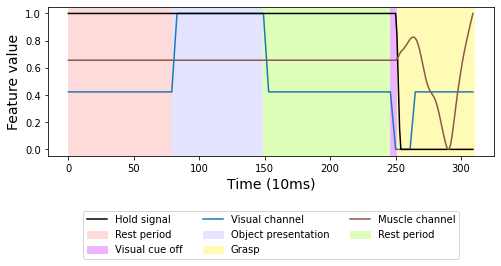

In [93]:
# Graph one input feature, the hold signal, and one output feature.
# Normalize to 0,1 since they may have different dynamic ranges.

fig = plt.figure(figsize=(8, 2.75))

tmax = inps.shape[-1]

infeat = torch.empty(tmax)
hold = torch.empty(tmax)
outfeat = torch.empty(tmax)

inps = d['inp'][bidx]
outs = d['targ'][bidx]

for tidx in range(tmax):
    infeat[tidx] = inps[fidx_i, tidx]
    hold[tidx] = inps[-1, tidx]
    outfeat[tidx] = outs[fidx_o, tidx]
    
infeat -= infeat.min()
outfeat -= outfeat.min()

infeat = infeat / infeat.max()
outfeat = outfeat / outfeat.max()

# fig.suptitle("Single Trial Timeline", fontsize=20)

plt.plot(infeat.numpy())
plt.plot(hold.numpy(), color='black')
plt.plot(outfeat.numpy(), color='tab:brown')

orange_patch = Line2D([0], [0], color='black', label='Hold signal')
blue_patch = Line2D([0], [0], color='tab:blue', label='Visual channel')
purple_patch = Line2D([0], [0], color='tab:brown', label='Muscle channel')
p1_patch = mpatches.Patch(color='#fddbdb', label='Rest period')
p2_patch = mpatches.Patch(color='#e5e4ff', label='Object presentation')
p3_patch = mpatches.Patch(color='#deffb9', label='Rest period')
p4_patch = mpatches.Patch(color='#eeb5ff', label='Visual cue off')
p5_patch = mpatches.Patch(color='#fffab5', label='Grasp')
legend1 = fig.axes[0].legend(handles=[orange_patch, p1_patch, p4_patch, blue_patch, p2_patch, p5_patch, purple_patch, p3_patch],
            loc="lower center", bbox_to_anchor=(0.50, -0.72), ncol=3)

CO_STIM_START = 79
CO_STIM_END = 149
CO_HOLD_LIFT = 246
CO_GRASP_START = 251
fig.axes[0].axvspan(0, CO_STIM_START, alpha=1, color='#fddbdb')
fig.axes[0].axvspan(CO_STIM_START, CO_STIM_END, alpha=1, color='#e5e4ff')
fig.axes[0].axvspan(CO_STIM_END, CO_HOLD_LIFT, alpha=1, color='#deffb9')
fig.axes[0].axvspan(CO_HOLD_LIFT, CO_GRASP_START, alpha=1, color='#eeb5ff')
fig.axes[0].axvspan(CO_GRASP_START, tmax, alpha=1, color='#fffab5')


plt.xlabel("Time (10ms)", fontsize=14)
plt.ylabel("Feature value", fontsize=14)


plt.savefig('paper/figs/trial_timeline.png', format='png', dpi=300, bbox_inches='tight')

plt.show()